In [1]:
%load_ext autoreload
%autoreload complete

In [47]:
from protest_impact.synthetic_region.hyperopt import get_study_df

study_df = get_study_df("test_xyz123")
study_df[
    [
        "method",
        "min_count",
        "sample_size",
        "sample_size_effective",
        "standardize",
        "mae_mean",
        "mse_mean",
        "mse_std",
        "random_post_diff_mean_week_1",
        "random_post_diff_mean",
        "protest_post_diff_mean_week_1",
        "protest_post_diff_mean",
    ]
].sort_values("mse_mean")

[autoreload of protest_impact.synthetic_region.hyperopt failed: Traceback (most recent call last):
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 271, in check
    superreload(m, reload, self.old_objects, self.shell)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/Users/david/Repositories/protest-impact/.venv/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 319, in update_instances
    object.__setattr__(ref, "__class

,method,min_count,sample_size,sample_size_effective,standardize,mae_mean,mse_mean,mse_std,random_post_diff_mean_week_1,random_post_diff_mean,protest_post_diff_mean_week_1,protest_post_diff_mean
2,ridge,0.1,200,200.0,True,0.635616,0.975166,1.066168,-0.016607,0.030295,0.173368,-0.02547
5,ridge,0.1,200,200.0,True,0.635616,0.975166,1.066168,-0.016607,0.030295,0.173368,-0.02547


<Axes: >

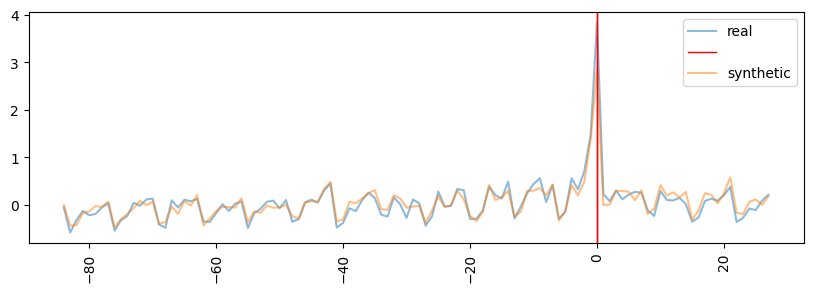

In [48]:
agg_df = pd.DataFrame(study_df["agg_df_protest"].loc[5])
from protest_impact.data.discourse.visual import plot_comparison

plot_comparison(agg_df, 0)

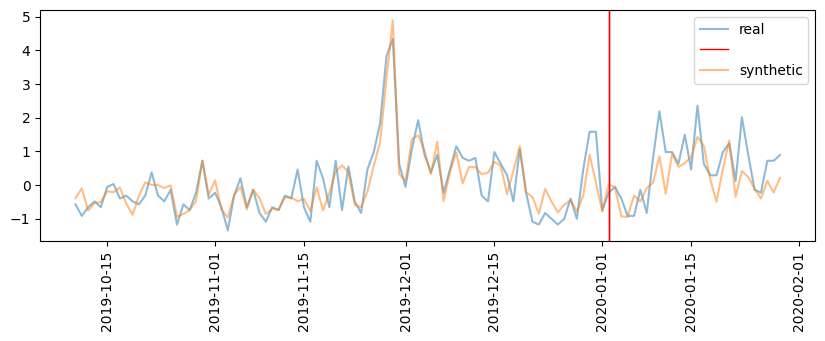

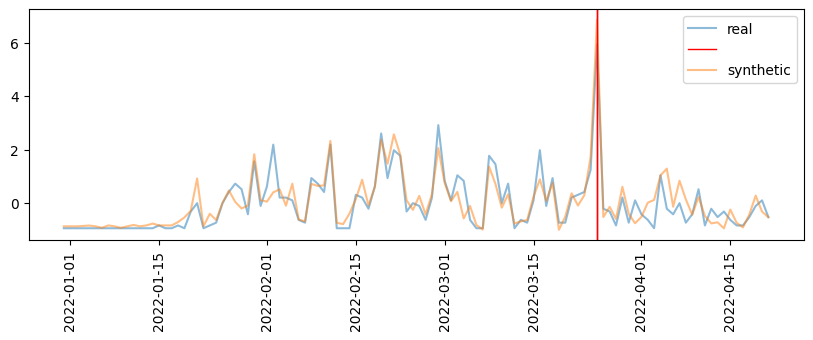

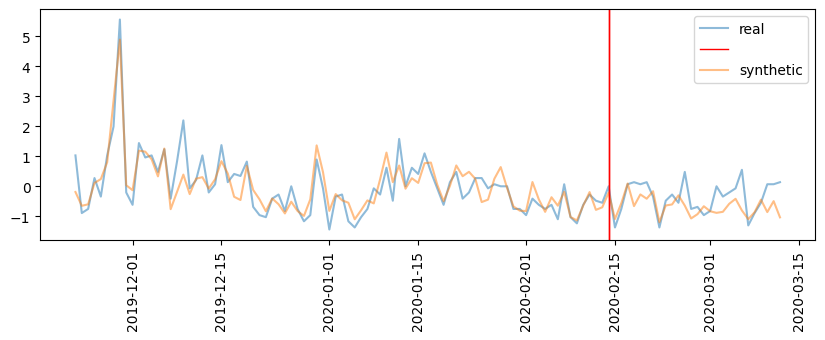

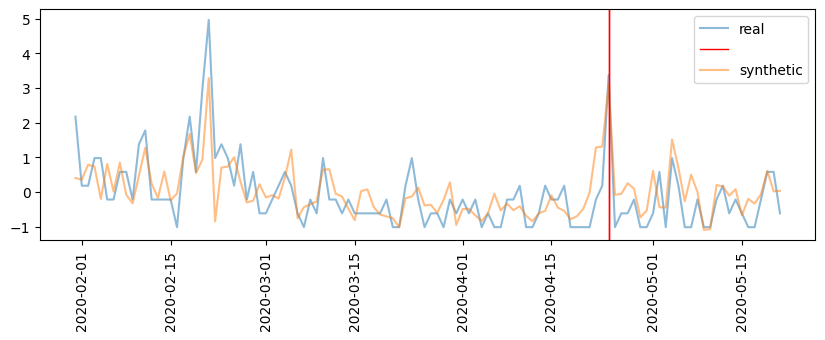

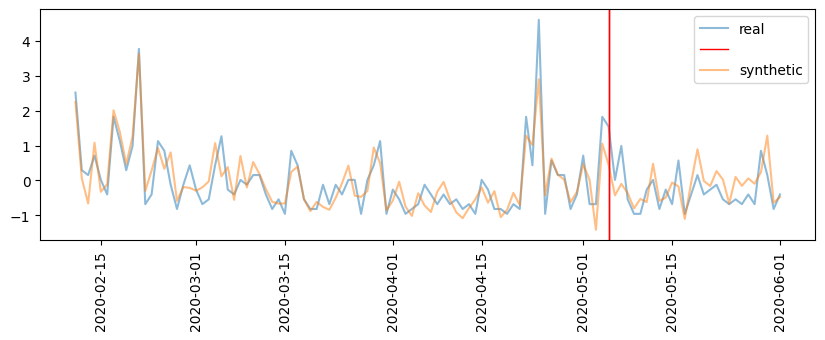

In [63]:
for row in study_df.to_dict(orient="records")[1:]:
    for protest in range(5):  # range(len(row["dfs_protest"])):
        df = pd.read_json(row["dfs_protest"][protest])
        plot_comparison(df, pd.Timestamp(row["events_protest"][protest]["event_date"]))